Accuracy of linear model used for predicting a null values of TotalCharges in the data set :  0.4238558780398537
Comparision chart  based on F1 Score of the models : 


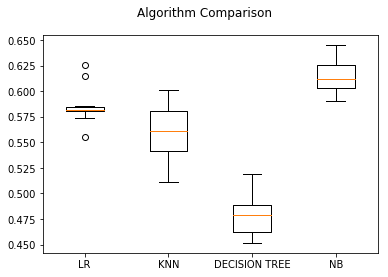

In [2]:
import numpy as np
import  pandas as pd
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier


cd=pd.read_csv("telecom.csv")
cdf=pd.DataFrame(cd)
list1 = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in list1:
    cdf[i] = cdf[i].replace({'No internet service':'No'})
cdf['MultipleLines'] = cdf['MultipleLines'].replace({'No phone service':'No'})

list2=[ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','Churn',
                'TechSupport','StreamingTV', 'StreamingMovies','MultipleLines','Partner','Dependents','PaperlessBilling','PhoneService']
for i in list2:
    cdf[i]= cdf[i].replace({'Yes':1,'No':0})
gen=pd.get_dummies(cdf["gender"],drop_first = True)
cdf=pd.concat((cdf,gen),axis=1)
cdf.drop(['gender'],axis=1,inplace=True)
y=pd.get_dummies(cdf["InternetService"])
y.drop(['No'],axis=1,inplace=True)
cdf.drop(['InternetService'],axis=1,inplace=True)
cdf=pd.concat((cdf,y),axis=1)
x=pd.get_dummies(cdf["Contract"])
cdf.drop(["Contract"],axis=1,inplace=True)
cdf=pd.concat((cdf,x),axis=1)
cdf.drop(["PaymentMethod"],axis=1,inplace=True)
cdf.drop(["customerID"],axis=1,inplace=True)
cdf['tenure']=cdf['tenure'].replace({0:0.1})
ten=np.log(cdf['tenure'])
cdf.drop(["tenure"],axis=1,inplace=True)
cdf=pd.concat((cdf,ten),axis=1)
cdf['TotalCharges'] =pd.to_numeric(cdf['TotalCharges'], errors ='coerce')
z=cdf.dropna()
index =cdf['TotalCharges'].index[cdf['TotalCharges'].apply(np.isnan)]
c=[]
c.extend(index)

d=cdf.loc[c,["MonthlyCharges"]]


x= z["MonthlyCharges"].values

m=len(x)
x=x.reshape((m,-1))




y= z["TotalCharges"].values
y = y.reshape((m,-1))

regmodel=linear_model.LinearRegression()
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)
regmodel.fit(x_train,y_train)
a= regmodel.predict(d)

list1=[]
for i in a:
    list1.extend(i)

r2= regmodel.score(x,y)
print("Accuracy of linear model used for predicting a null values of TotalCharges in the data set : ", r2)

for i in list1:
    cdf['TotalCharges']=(cdf['TotalCharges'].fillna(i,limit= 1))


tc=np.log(cdf['TotalCharges'])
cdf.drop(['TotalCharges'],axis=1,inplace=True)
cdf=pd.concat((cdf,tc),axis=1)
mc=np.log(cdf['MonthlyCharges'])
cdf.drop(['MonthlyCharges'],axis=1,inplace=True)
cdf=pd.concat((cdf,mc),axis=1)

cdf=cdf.abs()



x=cdf.drop('Churn',axis=1)
y=cdf['Churn']
# prepare configuration fro cross validation test harness
seed=7
#prepare models
models=[]
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('DECISION TREE',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))

results=[]
names=[]
scoring='f1'
for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed)
    cv_results=model_selection.cross_val_score(model,x,y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
fig=plt.figure()
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
print("Comparision chart  based on F1 Score of the models : ")
plt.show()




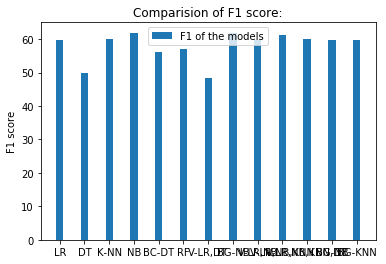

In [2]:
import matplotlib.pyplot as plt
import numpy as np
list4=[59.69543147208122, 49.81617647058824, 60.15779092702169, 61.678321678321666, 56.063618290258454, 56.93730729701954,
       48.426150121065376, 61.89473684210526, 59.61342828077314, 61.11111111111111, 60.10050251256281, 59.61342828077314, 
       59.781529294935446]
list3=['LR','DT','K-NN','NB','BC-DT','RF','V-LR,DT','BG-NB','V-LR,NB','V-LR,NB,KNN','V-LR,NB,KNN,DT','BG-NB','BG-KNN']

xpos=np.arange(len(list3))
plt.xticks(xpos,list3)
plt.ylabel("F1 score")
plt.title("Comparision of F1 score:")
plt.bar(xpos,list4,width=0.3,label="F1 of the models")
plt.legend()
plt.show()